<a href="https://colab.research.google.com/github/SakshamWase/Projects_developed/blob/main/Census_Income_SW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/content/census-income_final (4).csv", skipinitialspace= True)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
#let us see the shape
df.shape

(32561, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Unnamed: 14     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.describe(include = 'all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [9]:
df.describe(include = 'O')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Unnamed: 14
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [10]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Unnamed: 14'],
      dtype='object')

In [11]:
df = df.rename(columns = {'Unnamed: 14' : 'annual_income'})

In [12]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

In [13]:
df['annual_income'].value_counts()

<=50K    24720
>50K      7841
Name: annual_income, dtype: int64

In [14]:
#let's engineer the target columns
#np.where
df['annual_income'] = np.where(df['annual_income'] == '>50K',1,0)

In [15]:
df['annual_income'].value_counts()

0    24720
1     7841
Name: annual_income, dtype: int64

In [16]:
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [17]:
#null value imputation
df.isna().sum()  #that's great no null value

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [18]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [19]:
df.loc[df['workclass'] == '?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,0
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,0
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,0
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,1
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,1
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,0


In [20]:
#replacing '?' and replacing them nan
data = df.replace("?",np.nan)

In [21]:
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
annual_income        0
dtype: int64

In [22]:
data = data.dropna()

In [23]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [24]:
data.shape

(30162, 15)

In [25]:
# duplicate rows
len(data[data.duplicated()])

23

In [26]:
data.drop_duplicates(inplace = True)

In [27]:
data.shape

(30139, 15)

In [28]:
col = df.columns

In [29]:
col

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

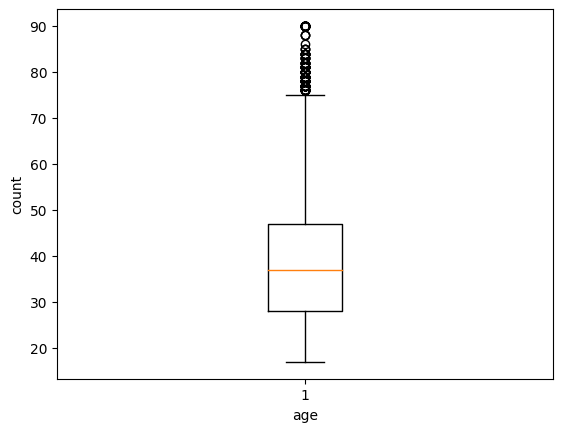

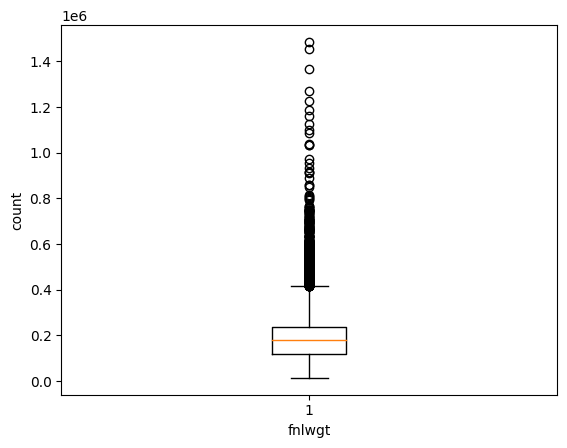

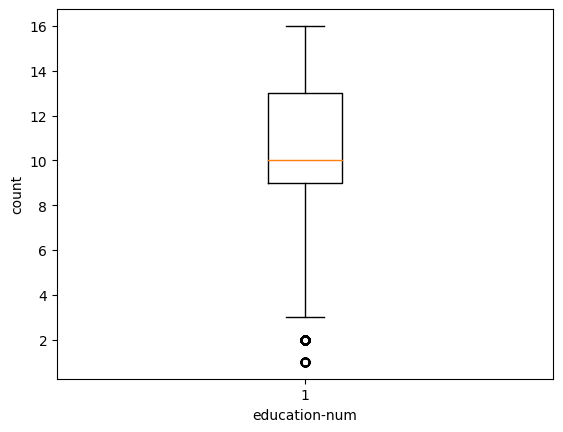

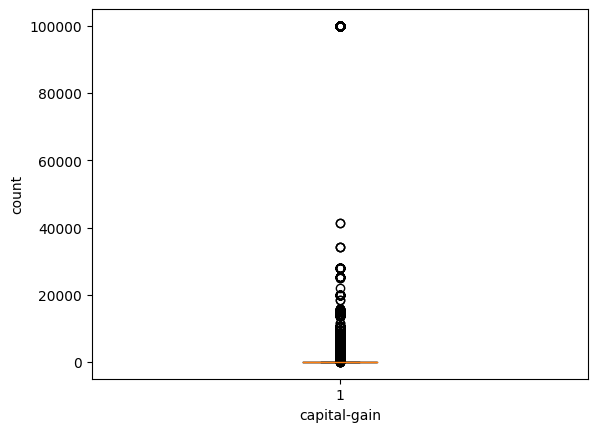

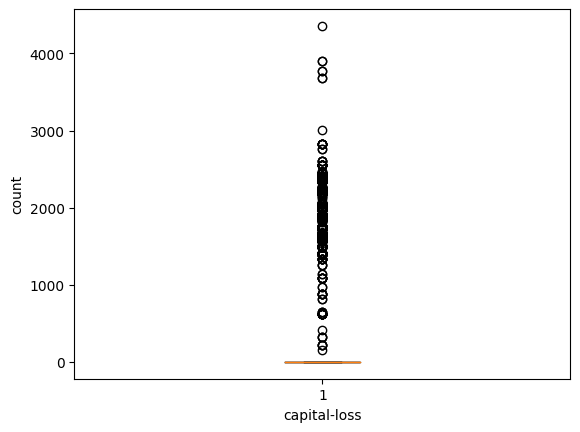

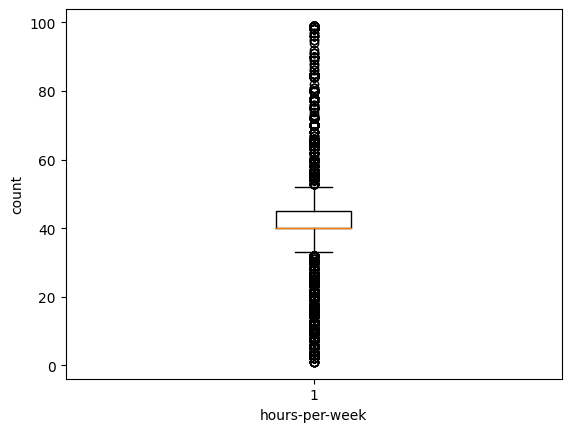

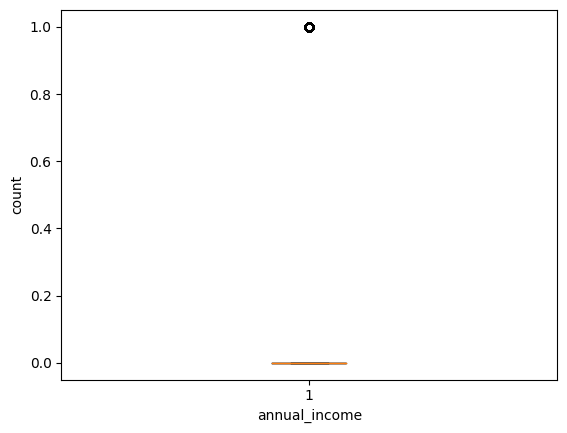

In [30]:
for col_name in col:
  if (data[col_name].dtypes == 'int64' or data[col_name].dtypes == 'float64'):
    plt.boxplot(data[col_name])
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

In [31]:
#data = data[((df['age']>=Q1-1.5*IQR) & (data['age']<=Q3+1.5*IQR))]

In [32]:
Q1 = data['fnlwgt'].quantile(0.25)
Q3 = data['fnlwgt'].quantile(0.75)

IQR=Q3-Q1

data = data[((data['fnlwgt']>=Q1-1.5*IQR) & (data['fnlwgt']<=Q3+1.5*IQR))]

Q1 = data['education-num'].quantile(0.25)
Q3 = data['education-num'].quantile(0.75)

IQR = Q3-Q1

data = data[((data['education-num']>=Q1-1.5*IQR) & (data['education-num']<=Q3+1.5*IQR))]

Q1 = data['capital-gain'].quantile(0.25)
Q3 = data['capital-gain'].quantile(0.75)

IQR = Q3-Q1

data = data[((data['capital-gain']>=Q1-1.5*IQR) & (data['capital-gain']<=Q3+1.5*IQR))]

Q1 = data['capital-loss'].quantile(0.25)
Q3 = data['capital-loss'].quantile(0.75)

IQR = Q3-Q1

data = data[((data['capital-loss']>=Q1-1.5*IQR) & (data['capital-loss']<=Q3+1.5*IQR))]

Q1 = data['hours-per-week'].quantile(0.25)
Q3 = data['hours-per-week'].quantile(0.75)

IQR = Q3-Q1

data = data[((data['hours-per-week']>=Q1-1.5*IQR) & (data['hours-per-week']<=Q3+1.5*IQR))]

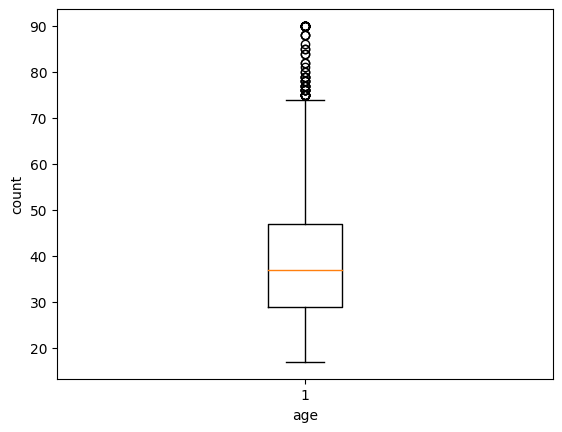

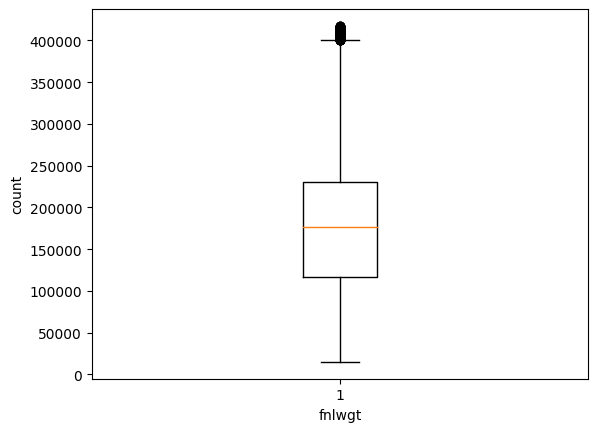

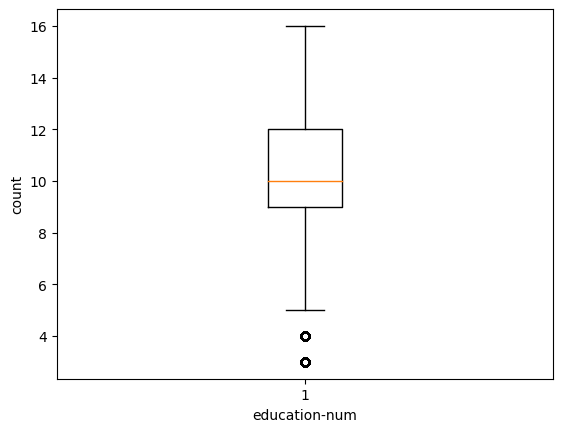

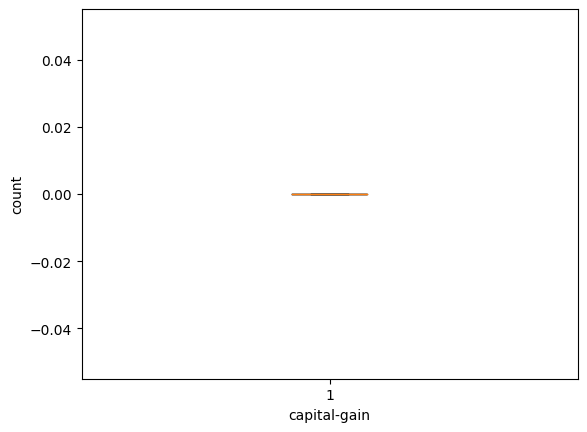

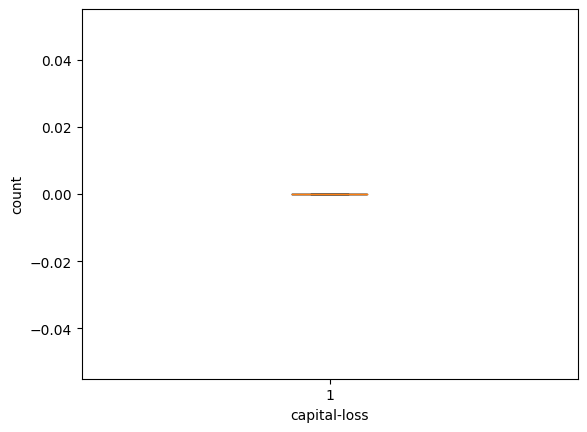

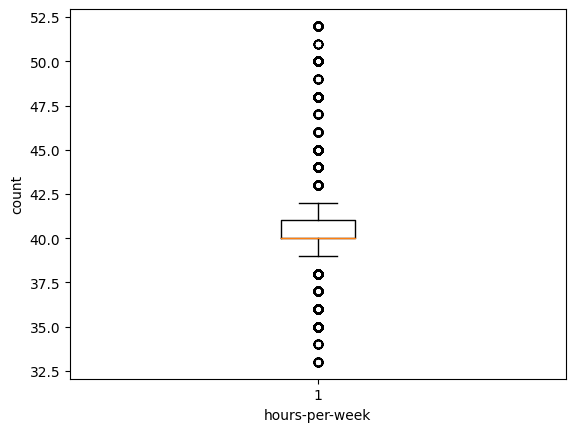

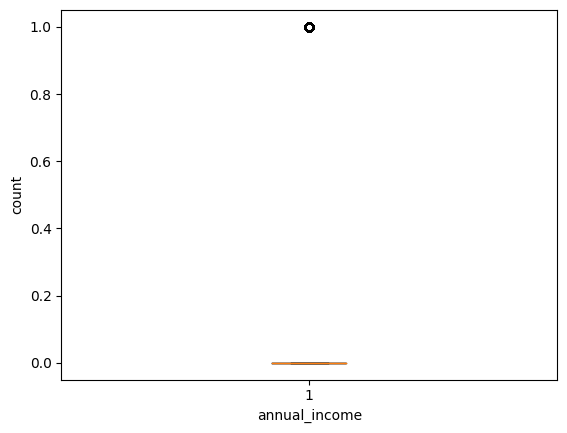

In [33]:
for col_name in col:
  if (data[col_name].dtypes == 'int64' or data[col_name].dtypes == 'float64'):
    plt.boxplot(data[col_name])
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

In [34]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1


In [35]:
# label encoding
col_list = []
for col in data.columns:
  if ((data[col].dtypes == 'object') & (col != 'annual_income')):
    col_list.append(col)

In [36]:
col_list

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [37]:
#import the label encoder class
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

for i in col_list:
  data[i] = label.fit_transform(data[i])

In [38]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
2,38,2,215646,10,9,0,5,1,4,1,0,0,40,37,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,338409,8,13,2,9,5,2,0,0,0,40,4,0
5,37,2,284582,11,14,2,3,5,4,0,0,0,40,37,0
7,52,4,209642,10,9,2,3,0,4,1,0,0,45,37,1


In [39]:
data.dtypes

age               int64
workclass         int64
fnlwgt            int64
education         int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
annual_income     int64
dtype: object

In [40]:
# feature selection
#vif

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if((data[col].dtype!="object") & (col!='annual_income')): # only num cols expect target
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

           Feature        VIF
0              age  11.361810
1        workclass   6.237685
2           fnlwgt   5.140345
3        education  10.375761
4    education-num  21.347463
5   marital-status   3.901880
6       occupation   3.038055
7     relationship   2.636454
8             race  19.173394
9              sex   4.708504
10    capital-gain        NaN
11    capital-loss        NaN
12  hours-per-week  62.455964
13  native-country  32.714182


In [41]:
data = data.drop(['hours-per-week'], axis = 1)

In [43]:
# feature selection
#vif

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if((data[col].dtype!="object") & (col!='annual_income')): # only num cols expect target
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

           Feature        VIF
0              age  10.255803
1        workclass   6.094491
2           fnlwgt   4.978554
3        education  10.275392
4    education-num  19.390224
5   marital-status   3.813203
6       occupation   3.011251
7     relationship   2.548728
8             race  17.521689
9              sex   4.413766
10    capital-gain        NaN
11    capital-loss        NaN
12  native-country  27.973871


In [44]:
data = data.drop(['native-country'], axis = 1)

In [45]:
# feature selection
#vif

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if((data[col].dtype!="object") & (col!='annual_income')): # only num cols expect target
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

           Feature        VIF
0              age   9.488014
1        workclass   6.025474
2           fnlwgt   4.940626
3        education   9.990229
4    education-num  18.258901
5   marital-status   3.722475
6       occupation   3.002651
7     relationship   2.445673
8             race  14.997350
9              sex   4.300851
10    capital-gain        NaN
11    capital-loss        NaN


In [46]:
data = data.drop(['education-num'], axis = 1)

In [47]:
# feature selection
#vif

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if((data[col].dtype!="object") & (col!='annual_income')): # only num cols expect target
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

           Feature        VIF
0              age   8.946468
1        workclass   5.947795
2           fnlwgt   4.902105
3        education   7.921450
4   marital-status   3.645837
5       occupation   2.909640
6     relationship   2.432365
7             race  14.010023
8              sex   4.289025
9     capital-gain        NaN
10    capital-loss        NaN


In [48]:
data = data.drop(['capital-gain','capital-loss','race'], axis = 1)

In [50]:
# feature selection
#vif

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if((data[col].dtype!="object") & (col!='annual_income')): # only num cols expect target
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

          Feature       VIF
0             age  7.735781
1       workclass  5.713766
2          fnlwgt  4.734391
3       education  7.301361
4  marital-status  3.563592
5      occupation  2.879542
6    relationship  2.372109
7             sex  4.036189


In [51]:
data = data.drop(['age'], axis = 1)

In [52]:
# feature selection
#vif

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if((data[col].dtype!="object") & (col!='annual_income')): # only num cols expect target
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

          Feature       VIF
0       workclass  5.169272
1          fnlwgt  4.554043
2       education  6.377067
3  marital-status  3.558408
4      occupation  2.809822
5    relationship  2.356341
6             sex  3.867686


In [53]:
data.columns

Index(['workclass', 'fnlwgt', 'education', 'marital-status', 'occupation',
       'relationship', 'sex', 'annual_income'],
      dtype='object')

In [54]:
# machine learning
x = data.iloc[:,:-1] #independent features
y = data['annual_income']  #dependent feature

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 56)

In [56]:
x_train

,workclass,fnlwgt,education,marital-status,occupation,relationship,sex
6476,1,210259,11,4,9,1,0
26227,2,213258,10,2,2,0,1
15768,2,114561,8,3,9,2,0
27863,2,338620,11,2,3,0,1
14619,2,153931,10,0,0,1,0
...,...,...,...,...,...,...,...
16398,2,188507,4,4,6,2,0
24070,2,192286,13,0,0,1,0
5784,2,159442,8,2,7,5,0
703,4,80145,13,2,2,0,1


In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [60]:
test_pred = log_reg.predict(x_test)
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
from sklearn.metrics import *

In [62]:
c1 = confusion_matrix(y_test,test_pred)
c1

array([[4368,    0],
       [1180,    0]])

In [63]:
accuracy_score(y_test,test_pred)

0.7873107426099495

In [64]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)
accuracy_score(dt_pred,y_test)

0.7736121124729632

In [65]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rt = RandomForestClassifier()
rt.fit(x_train,y_train)
rt_pred = rt.predict(x_test)
accuracy_score(rt_pred,y_test)

0.797945205479452

In [68]:
rt_pred

array([0, 1, 0, ..., 0, 0, 1])

In [69]:
# conclusion

1. Random Forest gives us best accuracy while classfying the income.

2. In case of Random Forest number incorrectly classified values are less.

SyntaxError: ignored